In [1]:
import scanpy as sc

sc_data = sc.read('data/SCP11/expression/melanoma_expression.txt')

In [6]:
print(sc_data.obs_vector)

<bound method AnnData.obs_vector of AnnData object with n_obs × n_vars = 23686 × 4645>


In [7]:
sc.pp.filter_cells(sc_data, min_genes=200)
sc.pp.filter_genes(sc_data, min_cells=3)

In [8]:
sc.pp.normalize_total(sc_data, target_sum=1e4)
sc.pp.log1p(sc_data)

In [9]:
sc.pp.calculate_qc_metrics(sc_data, inplace=True)


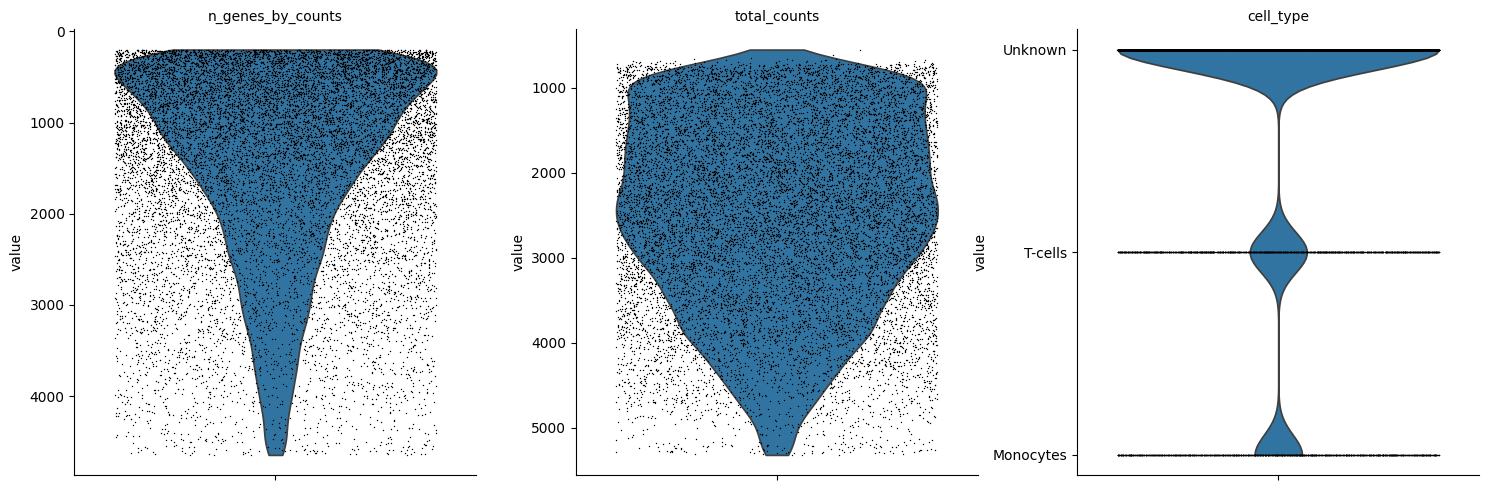

In [35]:
sc.pl.violin(sc_data, ['n_genes_by_counts', 'total_counts', 'cell_type'], jitter=0.4, multi_panel=True)


In [34]:
sc_data.obs.columns

Index(['n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'leiden', 'cell_type'],
      dtype='object')

In [18]:
sc.tl.pca(sc_data, svd_solver='arpack')


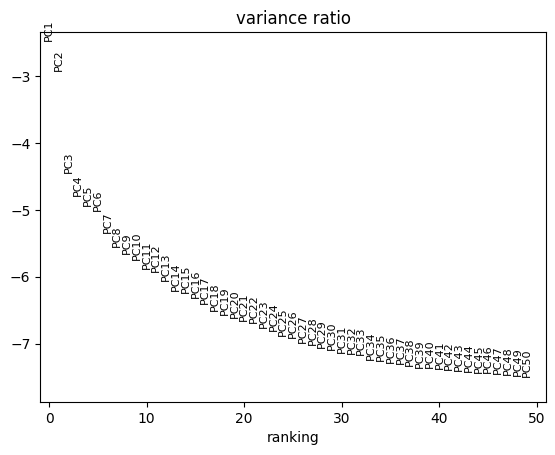

In [19]:
sc.pl.pca_variance_ratio(sc_data, log=True, n_pcs=50)


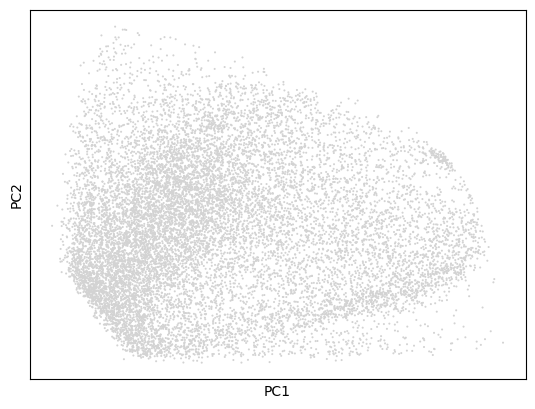

In [22]:
sc.pl.pca(sc_data)  # Color by a specific gene, like CST3


In [24]:
sc.pp.neighbors(sc_data, n_neighbors=10, n_pcs=40)

/home/ptandon1/git/scRNA_scp_analysis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
sc.tl.umap(sc_data)


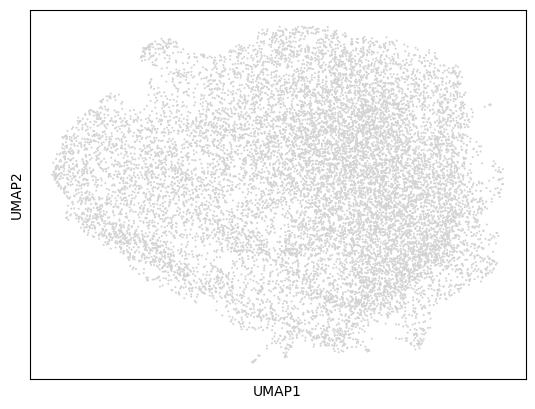

In [26]:
sc.pl.umap(sc_data)

/tmp/ipykernel_26157/2731776779.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sc_data)


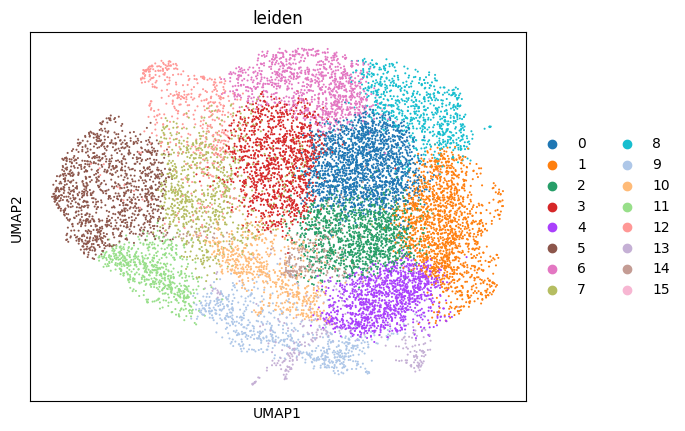

In [27]:
# Run clustering (Louvain or Leiden algorithm)
sc.tl.leiden(sc_data)

# Visualize clustering results on UMAP
sc.pl.umap(sc_data, color=['leiden'])

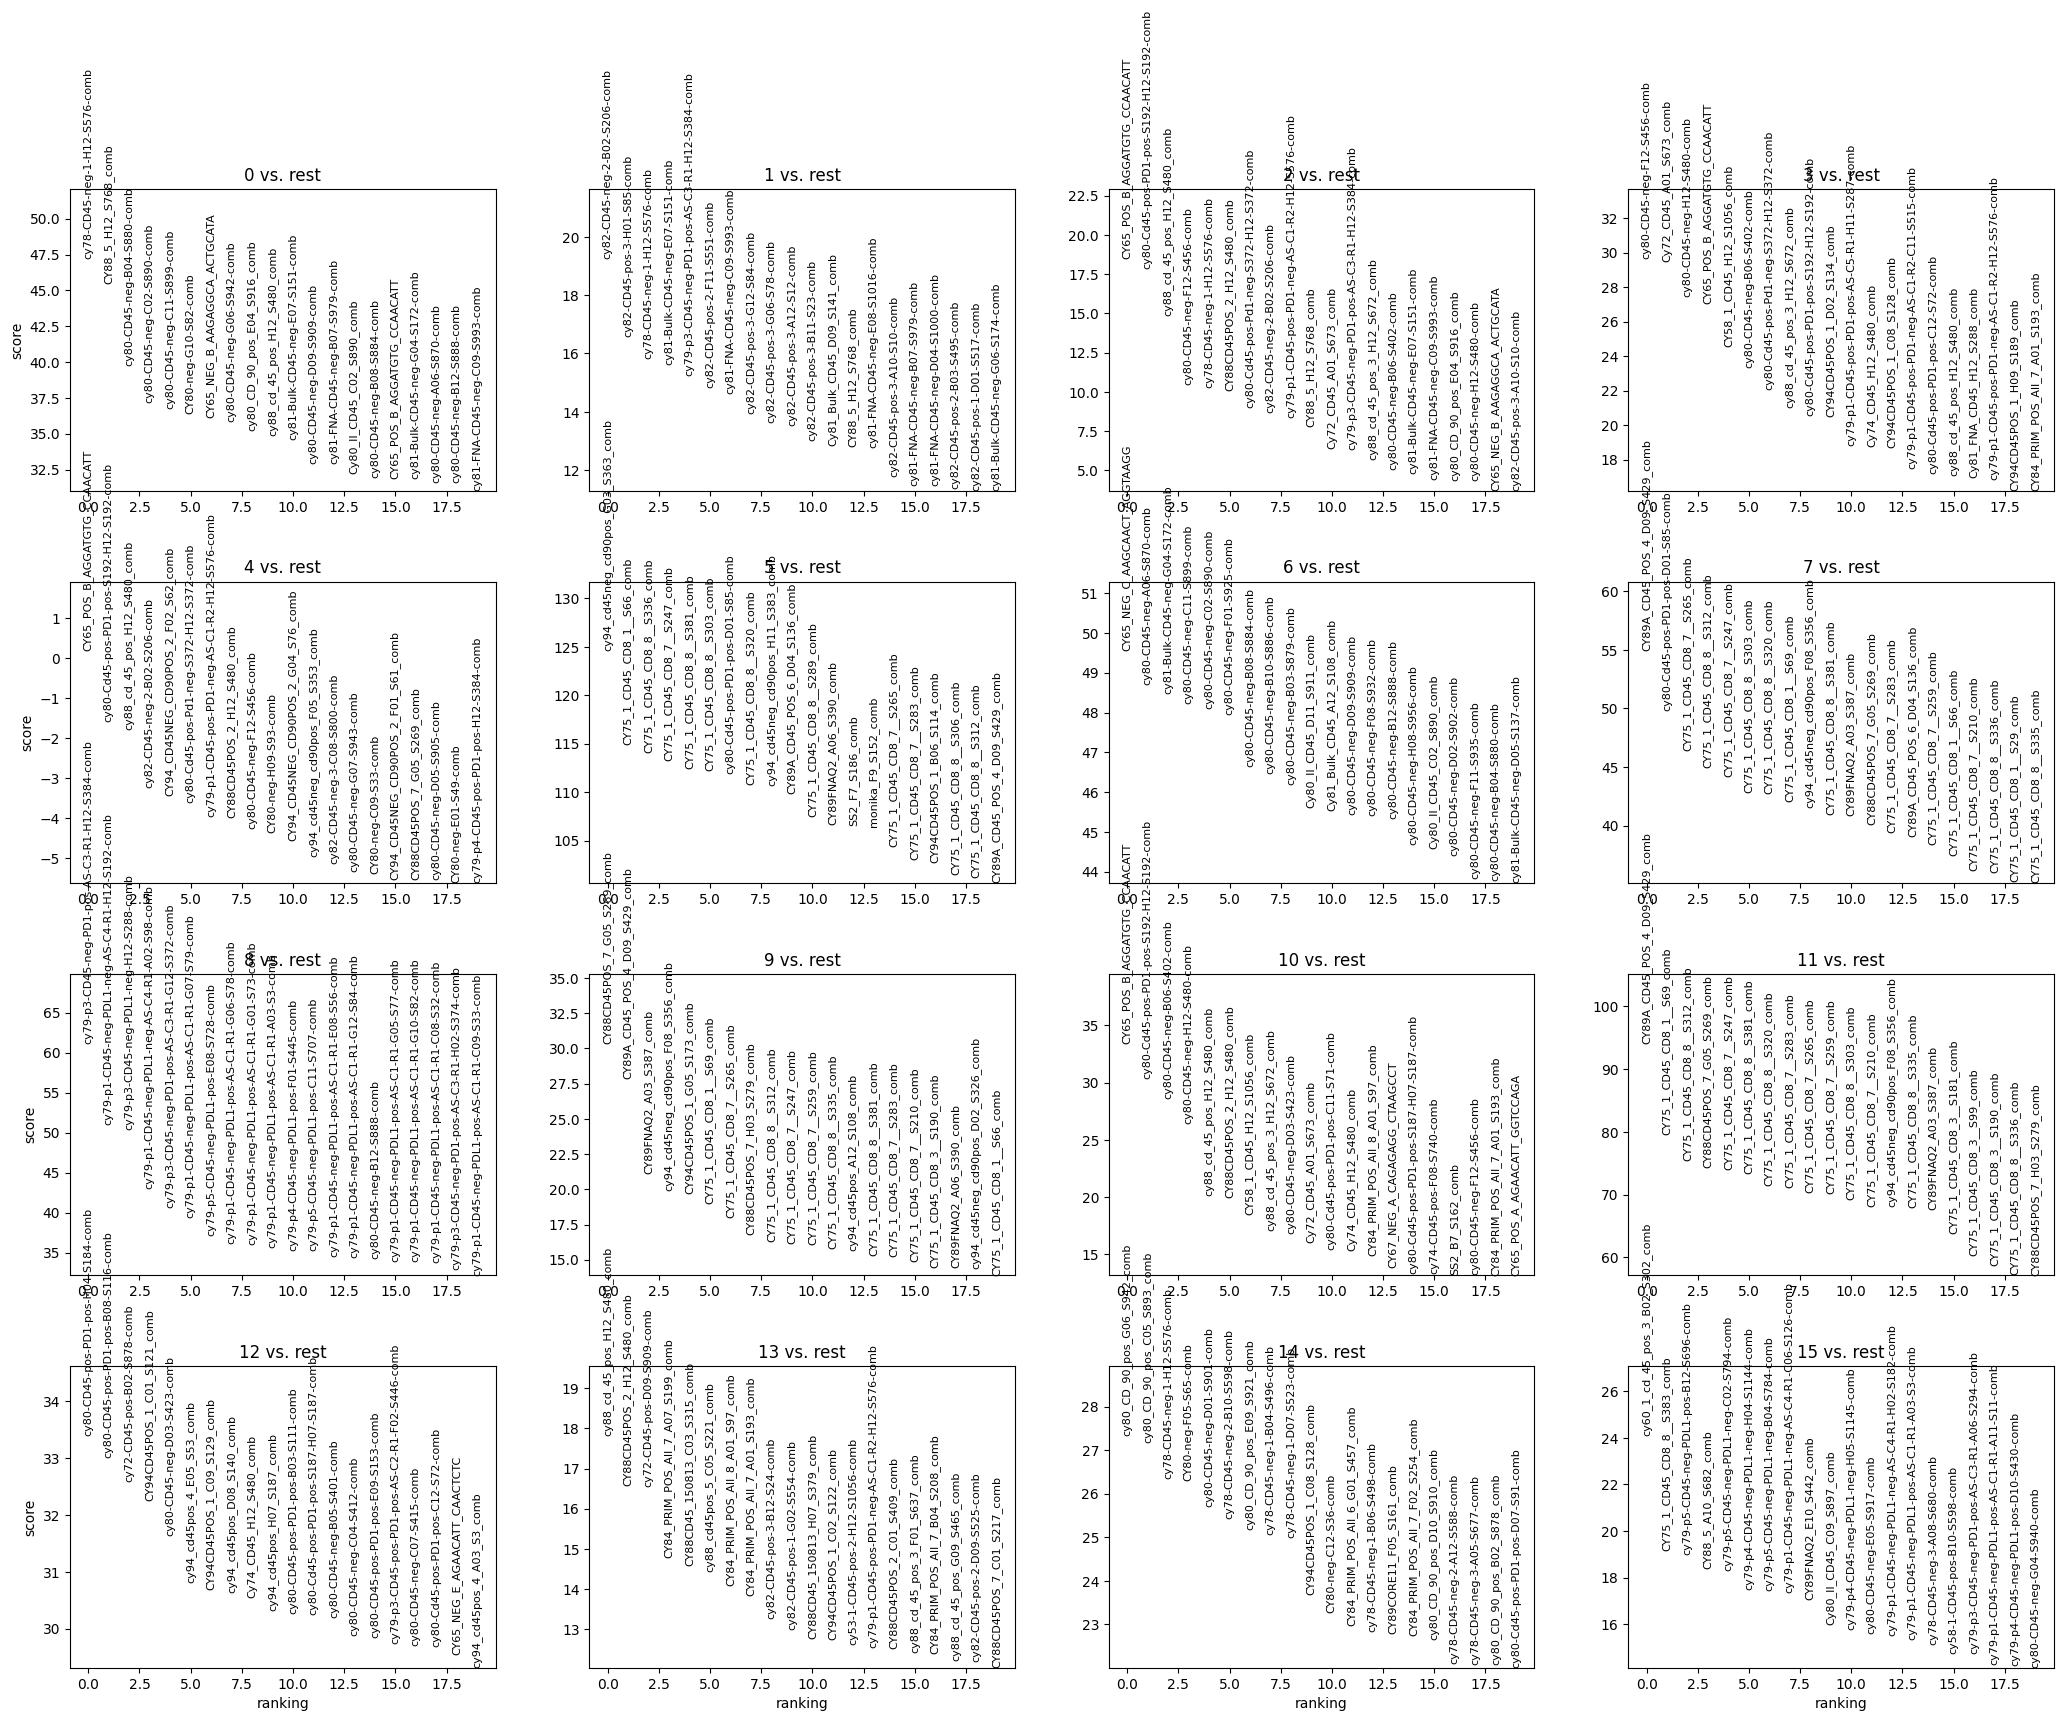

In [28]:
# Find markers for each cluster
sc.tl.rank_genes_groups(sc_data, groupby='leiden', method='t-test')

# Visualize top differentially expressed genes
sc.pl.rank_genes_groups(sc_data, n_genes=20, sharey=False)

In [29]:
# Annotate cell types based on known markers
sc_data.obs['cell_type'] = 'Unknown'
sc_data.obs.loc[sc_data.obs['leiden'] == '0', 'cell_type'] = 'T-cells'
sc_data.obs.loc[sc_data.obs['leiden'] == '1', 'cell_type'] = 'Monocytes'

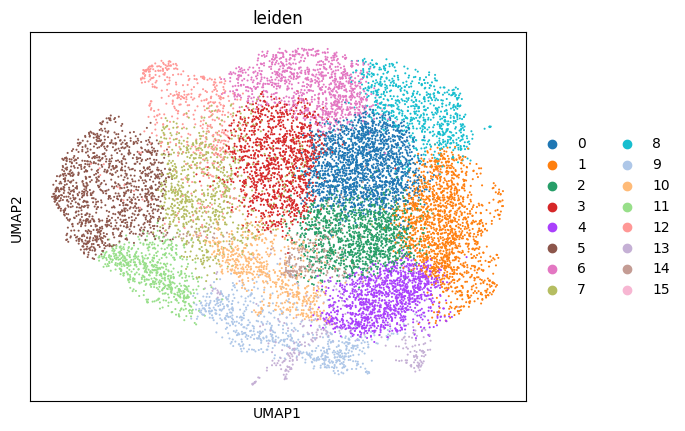

In [30]:
sc.pl.umap(sc_data, color=['leiden'])

In [32]:
sc_data.obs['cell_type'].value_counts()

cell_type
Unknown      10380
T-cells       1842
Monocytes     1531
Name: count, dtype: int64

In [36]:
sc.tl.tsne(sc_data, n_pcs=40)


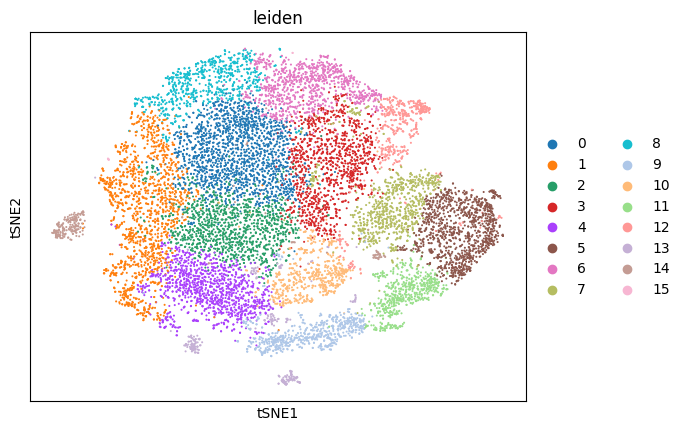

In [37]:
sc.pl.tsne(sc_data, color=['leiden'])